In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

## Exercise 1
- probability(rolling doubles on rolling 2 dice)
- p(e) 
- p(event)
- p(rolling doubles on 2 dice)

In [2]:
rolls = np.random.choice([1, 2, 3, 4, 5, 6], size=(2, 100_000))
rolls

array([[4, 5, 3, ..., 4, 1, 4],
       [5, 5, 2, ..., 4, 4, 6]])

In [3]:
rolls[0].size

100000

In [4]:
# In this approach, the array values at each index are the trial, the event of rolling two dice.
die1 = rolls[0]
die2 = rolls[1]

In [5]:
print(die1[1])
print(die2[1])

5
5


In [6]:
# vectorization here is that we don't have to worry about the index
(die1 == die2).mean()

0.16813

In [7]:
# a Pandas assisted approach to the same problem
rolls = rolls.T # .T means transpose
df = pd.DataFrame(rolls)
df.head(3)

,0,1
0,4,5
1,5,5
2,3,2


In [8]:
df["doubles"] = df[0] == df[1]
df.doubles.mean()

0.16813

## Exercise 2

### If you flip 8 coins...
- What is the probability of getting exactly 3 heads? 
- What is the probability of getting more than 3 heads?
- trial is flipping 8 coins

In [9]:
# If you flip 8 coins
# What is the probability of getting exactly 3 heads? 
# What is the probability of getting more than 3 heads?

# Flip 8 coins
n_coins = 8

# With this many simulations
n_simulations = 100_000

# Heads is 1 and Tails is 0.
# flips = np.random.choice([0, 1], n_simulations * n_coins).reshape(n_simulations, n_coins)
flips = np.random.choice([0, 1], size=(n_simulations * n_coins))

In [10]:
flips

array([1, 0, 1, ..., 0, 1, 0])

In [11]:
# Peek at the first row
flips[0]

1

In [12]:
# .sum(axis=1) sums up each row
results = flips.sum(axis=1)
results

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
# What is the probability of getting exactly 3 heads? 
(results == 3).mean()

In [ ]:
(results == 8).mean()

In [ ]:
# What is the probability of getting more than 3 heads?
(results > 3).mean()

## Exercise 3

There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. 

Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?


In [ ]:
outcomes = np.random.choice(["Web Dev", "Data Science"], size=(100_000, 2), p=[.75, .25])

In [ ]:
df = pd.DataFrame(outcomes)
df.columns = ["first_billboard", "second_billboard"]

# both column holds the result of the & operation
# comparisons that return a series of boolean can be combined with &, | for "or"
df["both"] = (df.first_billboard == "Data Science") & (df.second_billboard == "Data Science")
df.head(5)

In [ ]:
both = df.both.mean()
f"The probabiility of both being Data Science billboards is {both}"

In [ ]:
df.both.value_counts(normalize=True)
# DS, DS,
# DS, WD
# WD, DS
# WD, WD

## Exercise 4
Codeup students buy, on average, 3 poptart packages (+- 1.5) a day from the snack vending machine. 

If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon?


In [ ]:
# Round the poptart values b/c we can't buy fractions of poptarts from a vending machine
poptarts = np.round(np.random.normal(3, 1.5, size=(100_000, 5)))

In [ ]:
print(f"Standard Deviation is {poptarts.std()}")
print(f"Mean is {poptarts.mean()}")

In [ ]:
poptarts.min()

In [ ]:
# First week's poptart consumption. 
# Each row simulates a week
poptarts[0]

In [ ]:
# .sum(axis=1) sums up each row which means the total of poptarts purchased that week
weekly_demand = poptarts.sum(axis=1)
weekly_demand

In [ ]:
# how many weeks have less demand than 17 poptarts
(weekly_demand < 17).mean()

## Exercise 5

#### Compare Heights

- Men have an average height of 178 cm and standard deviation of 8cm.
- Women have a mean of 170, sd = 6cm.
- If a man and woman are chosen at random, P(woman taller than man)?


In [ ]:
trials = 100_000
m_heights = np.random.normal(178, 8, trials)
f_heights = np.random.normal(170, 6, trials)

In [ ]:
f_heights

In [ ]:
(m_heights < f_heights)

In [ ]:
# p(f_heights > m_heights)
(m_heights < f_heights).mean()

In [ ]:
# p(m_heights == f_heights)
f_heights == m_heights

## Exercise 6

When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails

- What are the odds that after having 50 students download anaconda, no one has an installation issue? 
- 100 students?
- What is the probability that we observe an installation issue within the first 150 students that download anaconda?
- How likely is it that 450 students all download anaconda without an issue?




In [ ]:
trials = 10_000

In [ ]:
students_per_trial = 50

# 0 is a fail, 1 is success
installs = np.random.choice([0, 1], size=(trials, students_per_trial), p=([1/250, 249/250]))
df = pd.DataFrame(installs)
df.head()

In [ ]:
# integer location
# .iloc[rows, columns]
# rows 1 and 2, column 0 through 4
df.iloc[0:2, 0:4]

In [ ]:
df["all_good"] = df.sum(axis=1) == students_per_trial
df.head()

In [ ]:
df.all_good.mean()

In [ ]:
students_per_trial = 100

installs = np.random.choice([0, 1], size=(trials, students_per_trial), p=([1/250, 249/250]))
df = pd.DataFrame(installs)
df["all_good"] = df.sum(axis=1) == students_per_trial
df.all_good.mean()

In [ ]:
# What is the probability that we observe an installation issue
# within the first 150 students that download anaconda?
students_per_trial = 150

installs = np.random.choice([0, 1], size=(trials, students_per_trial), p=([1/250, 249/250]))
df = pd.DataFrame(installs)
df["failures"] = df.sum(axis=1) < students_per_trial

f"Average rate of any failure on installs in 150 is {df.failures.mean()}"

In [ ]:
students_per_trial = 450

installs = np.random.choice([0, 1], size=(trials, students_per_trial), p=([1/250, 249/250]))
df = pd.DataFrame(installs)
df["all_good"] = df.sum(axis=1) == students_per_trial
df.all_good.mean()

## Exercise 7

- There's a 70% chance on any given day that there will be at least one food truck at Travis Park. 
- However, you haven't seen a food truck there in 3 days. 
- How unlikely is this?



In [ ]:
# 1 is a truck, 0 is no truck
trucks = np.random.choice([1, 0], p=[.7, .3], size=(100_000, 3))
df = pd.DataFrame(trucks)
df.columns = ["day_1", "day_2", "day_3"]
df

In [ ]:
# Theoretical probability of seeing no food trucks across 3 days
.3 * .3 * .3

In [ ]:
df["appearances"] = df.day_1 + df.day_2 + df.day_3
(df.appearances == 0).mean()

In [ ]:
# How likely is it that a food truck will show up sometime this week?

trucks = np.random.choice([1, 0], p=[.7, .3], size=(100_000, 7))
df = pd.DataFrame(trucks)
df["appearances"] = df.sum(axis=1) # sum values across the rows
df.head()

In [ ]:
(df.appearances > 0).mean()

## Exericise 8

## If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?

In [1]:
import numpy as np
import pandas as pd

In [2]:
# calculate the odds of two people share a birthday
n_simulations = 100_000
n_people = 23

# 0, 1, 2, 3, ... 364
birthdays = np.random.choice(range(365), size=(n_simulations, n_people))
df = pd.DataFrame(birthdays)
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,337,184,92,189,157,193,302,3,322,1,...,60,143,133,3,296,15,212,148,119,214
1,14,104,20,348,291,148,328,162,267,260,...,315,50,321,270,187,125,194,17,102,33
2,217,351,74,124,346,315,143,326,284,158,...,94,178,148,29,274,85,85,324,115,126
3,56,327,45,223,245,301,165,361,291,208,...,173,168,145,166,244,100,310,347,261,193
4,181,184,251,326,125,336,332,126,324,140,...,34,167,330,36,217,294,291,360,104,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,306,157,33,30,167,286,322,67,21,350,...,83,168,90,46,4,192,158,238,74,128
99996,280,282,238,191,239,48,113,182,322,189,...,3,359,80,241,48,65,346,276,71,45
99997,183,62,135,0,63,227,356,354,6,344,...,60,58,69,240,29,183,303,307,274,49
99998,34,0,65,95,30,49,218,92,293,72,...,163,103,318,47,280,118,363,106,84,144


In [3]:
# Get the number of unique values per row
df["n_unique"] = df.nunique(axis=1)

df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,n_unique
0,337,184,92,189,157,193,302,3,322,1,...,143,133,3,296,15,212,148,119,214,21
1,14,104,20,348,291,148,328,162,267,260,...,50,321,270,187,125,194,17,102,33,23
2,217,351,74,124,346,315,143,326,284,158,...,178,148,29,274,85,85,324,115,126,22


In [5]:
# For exactly 2 people sharing a birthday in a room of 23 people, the number of n_unique values shoudl be 23-2
# 22 would be two individuals share a birthday
(df.n_unique == 22).mean()

0.36436

In [6]:
# calculate the odds of two people share a birthday in a room of 20 people
n_simulations = 100_000
n_people = 20
birthdays = np.random.choice(range(365), size=(n_simulations, n_people))
df = pd.DataFrame(birthdays)

# Get the number of unique values per row
# axis=1 means count unique values BY ROW
df["n_unique"] = df.nunique(axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,n_unique
0,166,152,13,207,222,32,86,250,146,233,...,184,53,74,271,336,84,149,227,35,20
1,81,81,36,18,213,50,358,280,36,150,...,213,294,179,170,38,10,317,361,195,17
2,134,225,357,159,259,28,151,227,176,277,...,37,280,184,316,136,76,130,330,49,20
3,231,162,249,221,87,38,197,31,160,361,...,294,336,272,23,271,151,114,35,364,20
4,301,228,315,218,34,88,110,13,261,315,...,54,362,237,167,109,304,325,160,343,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,302,324,332,209,167,293,236,359,305,355,...,364,231,236,228,27,208,363,269,16,19
99996,59,95,66,115,78,256,203,207,3,178,...,159,88,265,86,224,235,329,326,204,20
99997,80,297,196,22,238,183,46,95,269,164,...,104,201,82,146,112,153,185,308,163,20
99998,224,232,234,297,153,23,177,347,137,221,...,311,34,232,2,67,14,70,80,320,19


In [7]:
# Because we're looking for exactly 2 people w/ the same birthday, we're looking for n_people - 1 number unique
(df.n_unique == n_people - 1).mean()

0.32243

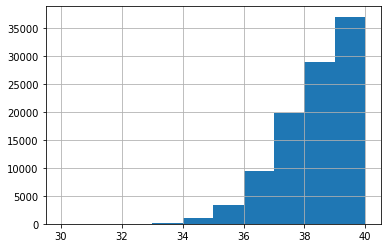

In [11]:
# calculate the odds of two people share a birthday in a room of 40 people
n_simulations = 100_000
n_people = 40
birthdays = np.random.choice(range(365), size=(n_simulations, n_people))
df = pd.DataFrame(birthdays)

# Get the number of unique values per row
df["n_unique"] = df.nunique(axis=1)
df.n_unique.hist()

In [12]:
(df.n_unique == n_people - 1).mean()

0.26146

In [17]:
# In a room of 30 people
# What are the odds that at least 2 people share a birthday

n_simulations = 100_000
n_people = 30
birthdays = np.random.choice(range(365), size=(n_simulations, n_people))
df = pd.DataFrame(birthdays)

# Get the number of unique values per row
df["n_unique"] = df.nunique(axis=1)

(df.n_unique <= n_people - 1).mean()

0.70679

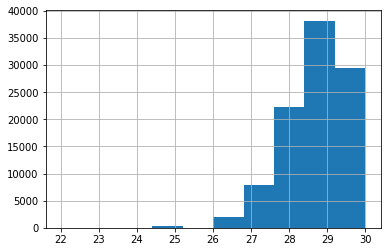

In [16]:
df.n_unique.hist()

In [18]:
# In a room of 40 people
# What are the odds that at least 2 people share a birthdau

n_simulations = 10_000
n_people = 40
birthdays = np.random.choice(range(365), size=(n_simulations, n_people))
df = pd.DataFrame(birthdays)

# Get the number of unique values per row
df["n_unique"] = df.nunique(axis=1)

(df.n_unique <= n_people - 1).mean()

0.8872

In [19]:
n_simulations = 10_000
n_people = 45
birthdays = np.random.choice(range(365), size=(n_simulations, n_people))
df = pd.DataFrame(birthdays)

# Get the number of unique values per row
df["n_unique"] = df.nunique(axis=1)

(df.n_unique <= n_people - 1).mean()

0.9405

In [20]:
n_simulations = 10_000
n_people = 53
birthdays = np.random.choice(range(365), size=(n_simulations, n_people))
df = pd.DataFrame(birthdays)

# Get the number of unique values per row
df["n_unique"] = df.nunique(axis=1)

(df.n_unique <= n_people - 1).mean()

0.9836

In [21]:
n_simulations = 10_000
n_people = 57
birthdays = np.random.choice(range(365), size=(n_simulations, n_people))
df = pd.DataFrame(birthdays)

# Get the number of unique values per row
df["n_unique"] = df.nunique(axis=1)

(df.n_unique <= n_people - 1).mean()

0.9897

In [ ]:
# is there a way to programmatically run these simulations up to a given mean?
# What number of people gives us 99% 

In [36]:
# Monte Carlo method == running a LOT of simulations
# Bayesian probability

n_simulations = 10_000

n_people = 0

threshold = .99
p_event = 0.0

output = {}

while p_event < threshold:
    n_people += 1

    birthdays = np.random.choice(range(365), size=(n_simulations, n_people))
    df = pd.DataFrame(birthdays)
    
    # Get the number of unique values per row
    df["n_unique"] = df.nunique(axis=1)
    
    p_event = (df.n_unique <= n_people - 1).mean()

    # dynamically generate key=>value pairs relating room size to probability
    output[n_people] = p_event

df = pd.Series(output)
df

1     0.0000
2     0.0022
3     0.0086
4     0.0153
5     0.0323
6     0.0392
7     0.0574
8     0.0745
9     0.0955
10    0.1163
11    0.1418
12    0.1718
13    0.1961
14    0.2296
15    0.2544
16    0.2851
17    0.3131
18    0.3471
19    0.3808
20    0.4124
21    0.4376
22    0.4779
23    0.5140
24    0.5274
25    0.5711
26    0.5952
27    0.6286
28    0.6524
29    0.6794
30    0.7102
31    0.7277
32    0.7537
33    0.7742
34    0.7884
35    0.8138
36    0.8379
37    0.8543
38    0.8676
39    0.8837
40    0.8890
41    0.9033
42    0.9149
43    0.9248
44    0.9341
45    0.9416
46    0.9444
47    0.9550
48    0.9603
49    0.9667
50    0.9716
51    0.9704
52    0.9777
53    0.9828
54    0.9834
55    0.9862
56    0.9890
57    0.9893
58    0.9908
dtype: float64

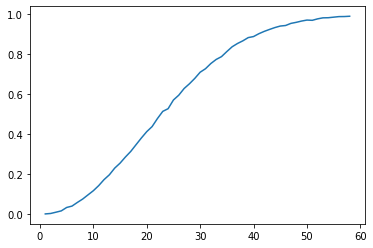

In [37]:
df.plot()

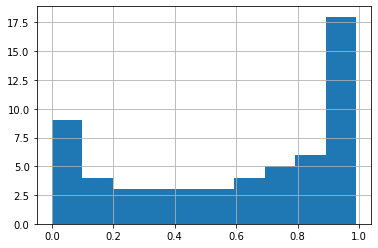

In [38]:
df.hist()

In [66]:
# The theoretical approach is known as "Frequentist statistics"
# We're using algebra (sometimes calculus) to produce probabilies and distributions of values
# Frequentist statistics is building distributions based on infinity number of trials

# x reperesents room sizes starting at 1 going to 100
x = range(1, 100)

# 0.5004771540365807 static probabiliy for room size of 23

# alebra here is N = (n(n-1))/2, the n is incrementing starting at 1, 2, 3, ... 100
# N = n * (n-1) / 2
# N will be a list of N for each room size
N = [n * (n-1) / 2 for n in x]

# Get the probability for each capital N
y = [1 - (364/365)** n for n in N]

In [67]:
y

[0.0,
 0.002739726027397249,
 0.008196680350730179,
 0.016326175132688192,
 0.02706194179780841,
 0.040317030519740005,
 0.05598498275133312,
 0.07394125468301205,
 0.09404486501284048,
 0.11614023654879224,
 0.14005919802473354,
 0.16562311016020548,
 0.19264507847148415,
 0.22093221466553126,
 0.25028790861398265,
 0.2805140738834109,
 0.31141333154182016,
 0.34279109940182606,
 0.37445755691404703,
 0.4062294594924657,
 0.437931780029604,
 0.4693991596297191,
 0.5004771540365807,
 0.5310232667433115,
 0.5609077642340204,
 0.5900142731165001,
 0.6182401629679479,
 0.6454967224493771,
 0.6717091395807101,
 0.6968162999539518,
 0.7207704190581927,
 0.7435365267749252,
 0.7650918234676976,
 0.785424927943206,
 0.8045350379211029,
 0.8224310235481093,
 0.8391304739689956,
 0.8546587160708248,
 0.8690478233012772,
 0.8823356309842172,
 0.8945647728747912,
 0.9057817518709361,
 0.916036055884961,
 0.9253793279312841,
 0.933864597553359,
 0.9415455788377616,
 0.9484760384836917,
 0.95470923

Text(0, 0.5, 'Probability')

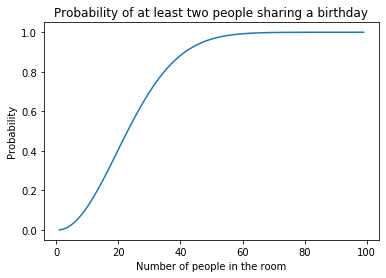

In [70]:
import matplotlib.pyplot as plt

plt.title("Probability of at least two people sharing a birthday")
plt.plot(x, y)
plt.xlabel("Number of people in the room")
plt.ylabel("Probability")